<a href="https://colab.research.google.com/github/SarahAlhugail/Machine_learning/blob/main/Week2_03_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Confusion Matrix

#### Dataset Options
1. Binary Classification Dataset of Your Choice
2. Seattle Rain Dataset
    - `https://github.com/daniel-dc-cd/data_science/raw/master/module_3_Python/data/seattle_weather_1948-2017.csv`
    - Note: target is `RAIN`
3. Titanic Dataset
    - `https://github.com/daniel-dc-cd/data_science/raw/master/module_3_Python/data/titanic.csv`
3. Customer Churn
    - `https://github.com/gumdropsteve/intro_to_machine_learning/raw/main/day_05/data/churn_data.csv`
    - [Data dict](https://docs.google.com/document/d/1SxzoPHWxoLHx_kiPTZEzZOoda2chHbHLdMGAFsGIqCY/edit?usp=sharing)
    - Note: target is `Churn`
4. Iris dataset
    - `https://raw.githubusercontent.com/gumdropsteve/datasets/master/iris.csv`
    - Note: 3 possible classes

1. Load in your dataset.

In [ ]:
import pandas as pd 

df= pd.read_csv('https://github.com/daniel-dc-cd/data_science/raw/master/module_3_Python/data/seattle_weather_1948-2017.csv')
df

,DATE,PRCP,TMAX,TMIN,RAIN
0,1948-01-01,0.47,51,42,True
1,1948-01-02,0.59,45,36,True
2,1948-01-03,0.42,45,35,True
3,1948-01-04,0.31,45,34,True
4,1948-01-05,0.17,45,32,True
...,...,...,...,...,...
25546,2017-12-10,0.00,49,34,False
25547,2017-12-11,0.00,49,29,False
25548,2017-12-12,0.00,46,32,False
25549,2017-12-13,0.00,48,34,False


2. Find out some information about the data...

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25551 entries, 0 to 25550
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   DATE    25551 non-null  object 
 1   PRCP    25548 non-null  float64
 2   TMAX    25551 non-null  int64  
 3   TMIN    25551 non-null  int64  
 4   RAIN    25548 non-null  object 
dtypes: float64(1), int64(2), object(2)
memory usage: 998.2+ KB


In [ ]:
df.head()

,DATE,PRCP,TMAX,TMIN,RAIN
0,1948-01-01,0.47,51,42,True
1,1948-01-02,0.59,45,36,True
2,1948-01-03,0.42,45,35,True
3,1948-01-04,0.31,45,34,True
4,1948-01-05,0.17,45,32,True


In [ ]:
df.describe()

,PRCP,TMAX,TMIN
count,25548.000000,25551.000000,25551.000000
mean,0.106222,59.544206,44.514226
std,0.239031,12.772984,8.892836
min,0.000000,4.000000,0.000000
25%,0.000000,50.000000,38.000000
50%,0.000000,58.000000,45.000000
75%,0.100000,69.000000,52.000000
max,5.020000,103.000000,71.000000


In [ ]:
df_new=df.dropna()

In [ ]:
df_new.isnull().sum()

DATE    0
PRCP    0
TMAX    0
TMIN    0
RAIN    0
dtype: int64

In [ ]:
df_new.RAIN.unique()

array([True, False], dtype=object)

In [ ]:
df_new['RAIN'] = df_new['RAIN'].astype(int)
df_new


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,DATE,PRCP,TMAX,TMIN,RAIN
0,1948-01-01,0.47,51,42,1
1,1948-01-02,0.59,45,36,1
2,1948-01-03,0.42,45,35,1
3,1948-01-04,0.31,45,34,1
4,1948-01-05,0.17,45,32,1
...,...,...,...,...,...
25546,2017-12-10,0.00,49,34,0
25547,2017-12-11,0.00,49,29,0
25548,2017-12-12,0.00,46,32,0
25549,2017-12-13,0.00,48,34,0


3. Show me the relationships in your data... 
- corr ([help](https://stackoverflow.com/a/50703596/11074111))
- pariplot
- some other visualizations (of your choice)

In [ ]:
corr = df_new.corr()
corr.style.background_gradient(cmap='coolwarm')

,PRCP,TMAX,TMIN,RAIN
PRCP,1.000000,-0.226736,-0.064365,0.515160
TMAX,-0.226736,1.000000,0.860675,-0.389241
TMIN,-0.064365,0.860675,1.000000,-0.139905
RAIN,0.515160,-0.389241,-0.139905,1.000000


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


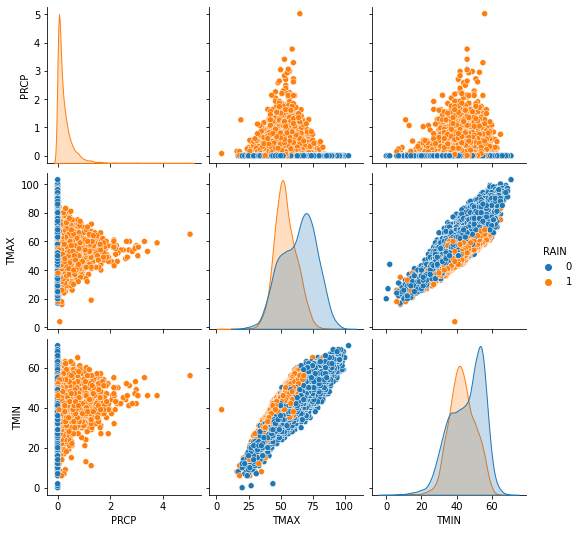

In [ ]:
import seaborn as sns

sns.pairplot(df_new, hue='RAIN');

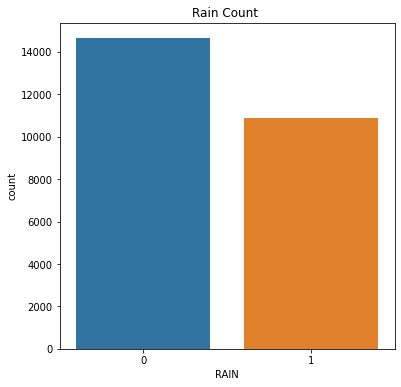

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,6))

sns.countplot(x="RAIN", data=df_new).set(title ='Rain Count ');

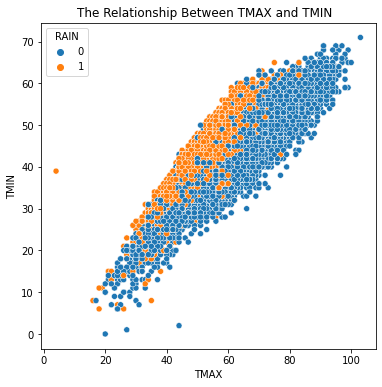

In [ ]:
plt.figure(figsize=(6,6))
sns.scatterplot(x=df_new.TMAX, y = df_new.TMIN , hue=df_new.RAIN).set(title ='The Relationship Between TMAX and TMIN  ');


*4*. Perform any data prep that needs to be done before splitting...

Note: may not be necessary, may require more cells

In [ ]:
X = df_new.PRCP
y = df_new.RAIN

5. Split your data into training and testing datasets...

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.75, random_state=2)

In [ ]:
X_train.tail(3)


6637     0.18
2575     0.00
23723    0.09
Name: PRCP, dtype: float64

In [ ]:
y_test.tail(3)


16039    0
22653    1
7861     1
Name: RAIN, dtype: int64

6. Import, create, and fit a LogisticRegression model with 1 variable

In [ ]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

In [ ]:
lr.fit(pd.DataFrame(X_train), y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

6. Make predictions on your `X_test` values...

In [ ]:
preds = lr.predict(pd.DataFrame(X_test))


In [ ]:
# what do they look like? (show me some of the predictions)
preds

array([0, 0, 0, ..., 0, 1, 1])

7. Score your model...
- accuracy_score

In [ ]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, preds)

0.8825217890506758

8. Confustion Matrix

In [ ]:
from sklearn.metrics import confusion_matrix
# make confusion matrix
confusion_matrix(y_test, preds)


array([[10999,     0],
       [ 2251,  5911]])

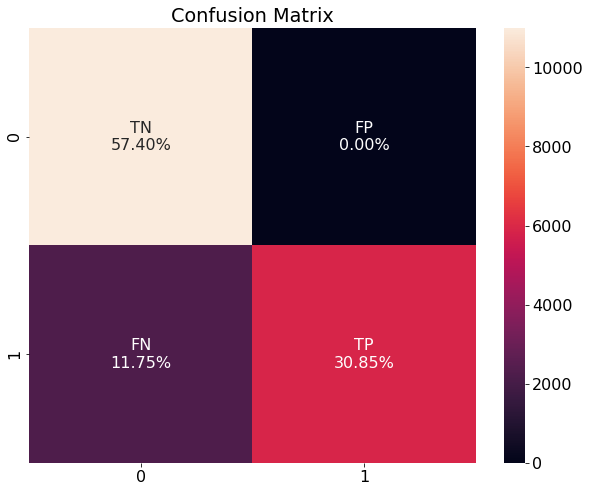

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix 

y_pred = lr.predict(pd.DataFrame(X_test))
cf = confusion_matrix(y_test, y_pred)

names =  ['TN', 'FP', 'FN','TP']
perc = ["{0:.2%}".format(value) for value in
                     cf.flatten()/np.sum(cf)]
labels = [f"{v1}\n{v2}" for v1, v2 in
          zip(names, perc)]
labels = np.asarray(labels).reshape(2,2)

plt.figure(figsize=(10,8))
plt.rcParams.update({'font.size': 16})
sns.heatmap(cf, annot=labels, fmt='').set_title("Confusion Matrix");

9. Explain your confusion matrix...
- How many of each value (TP, FP, TN, FN) do you have?
- What does each mean?

TN = 10999

FP= 0

FN= 2251

TP= 5911




TP = predicted Rain, is Rain

FP = predicted Rain, isn't Rain

TN = predicted not Rain, is not Rin

FN = predicted not Rain, is Rain


---



10. Create, and fit a LogisticRegression model with **more than** 1 variable

In [ ]:
from sklearn.model_selection import train_test_split
vars = ['PRCP', 'TMAX', 'TMIN'] 
X = df_new[vars]  
y = df_new.RAIN

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75, random_state=2)

In [ ]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

In [ ]:
lr.fit(pd.DataFrame(X_train), y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

11. Make predictions on your `X_test` values...

In [ ]:
preds = lr.predict(pd.DataFrame(X_test))


In [ ]:
# what do they look like? (show me some of the predictions)
preds

array([0, 0, 0, ..., 0, 1, 1])

12. Score your model...
- accuracy_score


In [ ]:
accuracy_score(y_test, preds)

0.932206043525912

13.  Confustion Matrix

In [ ]:
# make confusion matrix
confusion_matrix(y_test, preds)

array([[3662,   10],
       [ 423, 2292]])

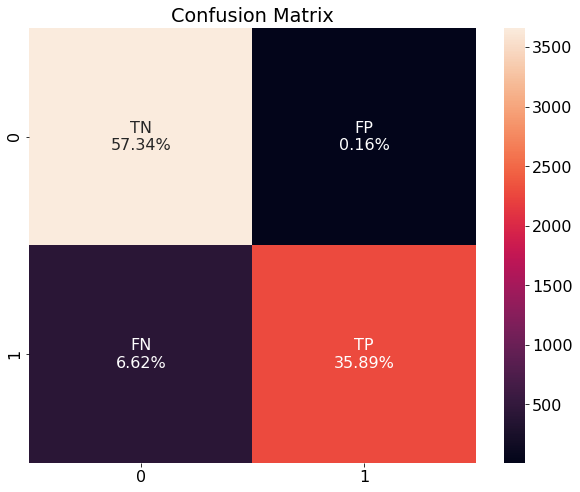

In [ ]:
y_pred = lr.predict(pd.DataFrame(X_test))
cf = confusion_matrix(y_test, y_pred)

names =  ['TN', 'FP', 'FN','TP']
perc = ["{0:.2%}".format(value) for value in
                     cf.flatten()/np.sum(cf)]
labels = [f"{v1}\n{v2}" for v1, v2 in
          zip(names, perc)]
labels = np.asarray(labels).reshape(2,2)

plt.figure(figsize=(10,8))
plt.rcParams.update({'font.size': 16})
sns.heatmap(cf, annot=labels, fmt='').set_title("Confusion Matrix");

14.  Explain your confusion matrix...
- How many of each value do you have?
- What does each mean?

TN = 3662

FP= 10

FN= 2292

TP= 423





TP = predicted Rain, is Rain

FP = predicted Rain, isn't Rain

TN = predicted not Rain, is not Rin

FN = predicted not Rain, is Rain


---



15. Which model is better? Why?

The 2nd model, the one with multi. variables, is better than the 1st one.


Reason: the accuracy score of the 2nd model is higher than the accuracy of the 1st one


## Bonus

16. Perform GridSearchCV with the better data

17. Update the hyperparameters of your model (create and fit a new model with the results of GridSerachCV)

14. Accuracy Score and Confusion Matrix

Did the score change at all? Why?

your stuff here

### Bonus Bonus
Figure out ROC plot. Tell me about it.

your stuff here

your stuff here